<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Urinary Essential Elements of Young Children with Autism Spectrum Disorder (ASD) and their Mothers

- [Mendeley Reference](https://data.mendeley.com/datasets/79fk29dvk6/1)
- [Science Direct Reference](https://www.sciencedirect.com/science/article/abs/pii/S1750946720300088?via%3Dihub)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

### Table of Contents <a class="anchor" id="PAN_top"></a>

* [Table of Contents](#PAN_top)
    * [Page 1 - Abstract](#PAN_page1)
    * [Page 2 - Imported Libraries](#PAN_page2)
    * [Page 3 - Import the Dataset](#PAN_page3)
    * [Page 4 - Setting Notebook Options](#PAN_page4)
    * [Page 5 - Looking at the Data](#PAN_page5)
    * [Page 6 - Checking the Column Names](#PAN_page6)
    * [Page 7 - Cleaning the Column Names](#PAN_page7)
    * [Page 8 - Creating a new Cleaned Dataset](#PAN_page8)
    * [Page 9 - Counting Columns](#PAN_page9)
    * [Page 10 - Get Info about the Dataset](#PAN_page10)
    * [Page 11 - Get Descriptive Statistics about the Dataset](#PAN_page11)
    * [Page 12 - Counting Rows and Removing any NANs](#PAN_page12)
    * [Page 13 - Q1: "Is there a predictive relationship between levels of toxic and essential elements and the occurrence of ASD?"](#PAN_page13)
    * [Page 14 - Q1 Analysis: Logistic Regressions](#PAN_page14)
    * [Page 15 - Q1 Analysis: Logistic Regressions: Correlation Matrix](#PAN_page15)
    * [Page 16 - Q1 Analysis: Logistic Regressions: Variance Inflation Factor](#PAN_page16)  
    * [Page 17 - Q1 Analysis: Logistic Regressions: Principal Component Analysis](#PAN_page17)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 1 - Abstract <a class="anchor" id="PAN_page1"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

### Background
Even though the cause of autism spectrum disorders (ASD) remains unknown, the current understanding points towards complex interactions between environmental and genetic factors. One important environmental factor to consider is intake of toxic and essential elements, and their role in metabolism. Essential elements have received considerably less attention in the literature than the presence of toxins in urine.

### Method
The purpose of this investigation is to comprehensively assess the association between urinary element compositions of 28 mothers who had young children with ASD and 29 mothers who had young typically developing (TD) children, and in a subset of their children (21 with ASD and 26 TD).

### Questions
1. Is there a predictive relationship between levels of toxic and essential elements and the occurrence of ASD?
2. How does the urine test differ (Toxic vs Non-Toxic) for kids with Autism (ASD) to Typically Developing kids (TD)?
3. How does the urine test differ (Toxic vs Non-Toxic) for mothers with Autism (ASD) to Typically Developing moms (TD)?
4. How does the urine test differ (Toxic vs Non-Toxic) for kids with Autism (ASD) to their moms with Autism(ASD)?

### Analysis Setup
DV1 = Status with 2 levels (ASD or TD)<br>
DV2 = Type with 2 levels (Child or Mother)<br>
IV1 = Group of 20 Toxic elements (Aluminum to Uranium) <br>
IV2 = Group of 19 Essential elements (Boron to Creatinine)

### Results
...  

### Conclusions
...  


<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 2 - Imported Libraries<a class="anchor" id="PAN_page2"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#Will add additional as we go

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 3 - Import the Dataset <a class="anchor" id="PAN_page3"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

In [57]:
data = pd.read_excel("../Data/DATA.xlsx")

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 4 - Setting Notebook Options<a class="anchor" id="PAN_page4"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

In [58]:
# reset the options
pd.reset_option('display.max_rows')

# set the option to display the maximum number of columns
pd.set_option('display.max_columns', 50)

# set the option to display the maximum number of rows
pd.set_option('display.min_rows', 105)
pd.set_option('display.max_rows', 105)

pd.describe_option('display.max_rows')
pd.describe_option('display.max_columns')

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 105]
display.max_columns : int
    If max_cols is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 or None and pandas will auto-detect
    the width o

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 5 - Looking at the Data<a class="anchor" id="PAN_page5"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

In [59]:
data

,'ID Number','Status','Type','Aluminum','Antimony','Arsenic','Barium','Beryllium','Bismuth','Cadmium','Cesium','Gadolinium','Lead','Mercury','Nickel','Palladium','Platinum','Tellurium','Thallium','Thorium','Tin','Tungsten','Uranium','Boron','Calcium','Chromium','Cobalt','Copper','Iron','Lithium','Magnesium','Manganese','Molybdenum','Phosphorus','Potassium','Selenium','Sodium','Strontium','Sulfur','Vanadium','Zinc','Creatinine'
0,1,'ASD','Child',7.000000,0.200000,11.000000,2.100000,0.000707,0.000113,0.000141,4.3,0.000099,0.200000,0.000424,4.900000,0.000849,0.000113,0.000566,0.100000,0.000042,1.600000,0.300000,0.000071,2.30,140.0,0.000424,0.001131,0.014,0.240000,0.083,200,0.000700,0.130,1180,24,0.110,56,0.130,680,0.000283,0.660,175.0
1,3,'ASD','Child',19.000000,0.200000,8.100000,8.000000,0.000354,0.000057,0.000071,16.0,0.000049,1.000000,0.000212,2.900000,0.000424,0.000057,0.000283,0.600000,0.000021,1.000000,0.200000,0.000035,4.90,81.0,0.000212,0.000566,0.018,0.200000,0.170,170,0.005000,0.180,360,120,0.094,290,0.170,860,0.000500,0.480,76.0
2,5,'ASD','Child',9.200000,0.000057,5.900000,4.700000,0.000354,0.200000,0.000071,11.0,0.000049,0.500000,0.000212,9.400000,0.000424,0.000057,0.000283,0.300000,0.000021,8.400000,0.600000,0.000035,2.90,300.0,0.000600,0.003000,0.021,0.600000,0.170,310,0.004000,0.170,1860,120,0.110,240,0.370,1050,0.000600,0.750,58.6
3,6,'ASD','Child',8.400000,0.000057,14.000000,3.000000,0.000354,0.000057,0.000071,16.0,0.000049,0.900000,0.000212,15.000000,0.000424,0.000057,0.000283,0.400000,0.000021,1.400000,0.300000,0.000035,8.60,200.0,0.001000,0.000566,0.024,0.430000,0.061,390,0.005000,0.043,150,120,0.069,190,0.330,630,0.000400,0.240,54.3
4,8,'ASD','Child',5.600000,0.000028,11.000000,3.800000,0.000177,0.000028,0.000035,4.5,0.000025,0.400000,1.000000,2.500000,0.000212,0.000028,0.000141,0.400000,0.000011,0.600000,0.300000,0.000018,1.30,62.0,0.001000,0.000283,0.022,0.035355,0.220,170,0.007000,0.085,910,180,0.140,190,0.120,1290,0.000800,0.270,30.6
5,10,'ASD','Child',17.000000,0.600000,15.000000,3.100000,0.000354,0.000057,0.000071,10.0,0.000049,0.500000,0.000212,5.200000,0.000424,0.000057,0.000283,0.200000,0.000021,0.500000,0.100000,0.000035,4.50,250.0,0.001000,0.000566,0.019,0.530000,0.120,180,0.002000,0.110,1200,54,0.180,330,0.240,800,0.000500,1.100,70.6
6,12,'ASD','Child',9.500000,0.000057,120.000000,4.200000,0.000354,0.000057,0.200000,5.7,0.000049,0.300000,0.000212,6.700000,0.000424,0.000057,0.000283,0.300000,0.000021,0.200000,0.300000,0.000035,3.80,340.0,0.000500,0.001000,0.018,0.630000,0.083,230,0.002000,0.100,1320,45,0.130,120,0.290,1090,0.000141,0.660,82.1
7,17,'ASD','Child',6.800000,0.200000,35.000000,4.000000,0.000707,0.000113,0.000141,3.3,33.000000,0.400000,0.000424,9.700000,0.000849,0.000113,0.000566,0.090000,0.000042,4.000000,1.200000,0.000071,2.20,170.0,0.001000,0.000900,0.018,0.300000,0.140,120,0.000400,0.140,260,14,0.089,91,0.350,670,0.000900,0.690,172.0
8,19,'ASD','Child',24.000000,0.200000,14.000000,2.600000,0.000354,0.000057,0.000071,4.4,0.000049,0.500000,0.000212,3.800000,0.000424,0.000057,0.000283,0.600000,0.000021,2.000000,0.070000,0.000035,4.50,150.0,0.000212,0.000566,0.020,0.340000,0.084,110,0.006000,0.058,810,120,0.091,200,0.260,690,0.000600,0.740,87.4
9,20,'ASD','Child',21.000000,0.070000,12.000000,1.800000,0.000354,0.000057,0.200000,3.6,0.000049,0.100000,0.000212,1.300000,0.000424,0.000057,0.000283,0.200000,0.000021,0.200000,0.200000,0.000035,2.40,38.0,0.000400,0.000566,0.020,0.070711,0.055,150,0.002000,0.083,900,51,0.100,45,0.060,990,0.000200,0.500,123.0


<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 6 - Checking the Column Names<a class="anchor" id="PAN_page6"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

In [60]:
# check the column names - notice the extra ' single quotes
print(data.columns)

Index([''ID Number'', ''Status'', ''Type'', ''Aluminum'', ''Antimony'',
       ''Arsenic'', ''Barium'', ''Beryllium'', ''Bismuth'', ''Cadmium'',
       ''Cesium'', ''Gadolinium'', ''Lead'', ''Mercury'', ''Nickel'',
       ''Palladium'', ''Platinum'', ''Tellurium'', ''Thallium'', ''Thorium'',
       ''Tin'', ''Tungsten'', ''Uranium'', ''Boron'', ''Calcium'',
       ''Chromium'', ''Cobalt'', ''Copper'', ''Iron'', ''Lithium'',
       ''Magnesium'', ''Manganese'', ''Molybdenum'', ''Phosphorus'',
       ''Potassium'', ''Selenium'', ''Sodium'', ''Strontium'', ''Sulfur'',
       ''Vanadium'', ''Zinc'', ''Creatinine''],
      dtype='object')


<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 7 - Cleaning the Column Names<a class="anchor" id="PAN_page7"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

In [61]:
# clean up the column names removing the extra '
data.columns = data.columns.str.replace("'", "")
# change the column name 'ID Number'
data.columns = data.columns.str.replace("ID Number", "ID")

In [62]:
# check the column names
print(data.columns)

Index(['ID', 'Status', 'Type', 'Aluminum', 'Antimony', 'Arsenic', 'Barium',
       'Beryllium', 'Bismuth', 'Cadmium', 'Cesium', 'Gadolinium', 'Lead',
       'Mercury', 'Nickel', 'Palladium', 'Platinum', 'Tellurium', 'Thallium',
       'Thorium', 'Tin', 'Tungsten', 'Uranium', 'Boron', 'Calcium', 'Chromium',
       'Cobalt', 'Copper', 'Iron', 'Lithium', 'Magnesium', 'Manganese',
       'Molybdenum', 'Phosphorus', 'Potassium', 'Selenium', 'Sodium',
       'Strontium', 'Sulfur', 'Vanadium', 'Zinc', 'Creatinine'],
      dtype='object')


<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 8 - Creating a new Cleaned Dataset<a class="anchor" id="PAN_page8"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

In [63]:
data.to_csv("../Data/clean_data.csv", index=False)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 9 - Counting Columns<a class="anchor" id="PAN_page9"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

In [64]:
# Count the number of columns
num_cols = data.shape[1]

print(num_cols)

42


<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 10 - Get Info about the Dataset<a class="anchor" id="PAN_page10"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

In [65]:
# usually objects are your key factors/independent variables where floats and ints are continuous/dependent variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          105 non-null    int64  
 1   Status      105 non-null    object 
 2   Type        105 non-null    object 
 3   Aluminum    105 non-null    float64
 4   Antimony    105 non-null    float64
 5   Arsenic     105 non-null    float64
 6   Barium      105 non-null    float64
 7   Beryllium   105 non-null    float64
 8   Bismuth     105 non-null    float64
 9   Cadmium     105 non-null    float64
 10  Cesium      105 non-null    float64
 11  Gadolinium  105 non-null    float64
 12  Lead        105 non-null    float64
 13  Mercury     105 non-null    float64
 14  Nickel      105 non-null    float64
 15  Palladium   105 non-null    float64
 16  Platinum    105 non-null    float64
 17  Tellurium   105 non-null    float64
 18  Thallium    105 non-null    float64
 19  Thorium     105 non-null    f

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 11 - Get Descriptive Statistics about the Dataset<a class="anchor" id="PAN_page11"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

## Descriptive statistics:
Basic descriptive statistics such as mean, median, mode, standard deviation, variance, range, and percentiles can be computed for each element to summarize its distribution.

In [66]:
# Calculate summary statistics for each element but drop "ID". Even though "ID" is numeric, we do not need stats on "ID"
stats = data.drop('ID', axis=1).describe()

# View the summary statistics
print(stats)

         Aluminum    Antimony     Arsenic      Barium   Beryllium     Bismuth   
count  105.000000  105.000000  105.000000  105.000000  105.000000  105.000000  \
mean     9.368598    0.059104   13.691641    2.718096    0.000458    0.315303   
std     12.035546    0.135363   16.684145    2.526504    0.000168    1.613558   
min      0.001414    0.000028    0.001061    0.000071    0.000177    0.000028   
25%      2.500000    0.000057    5.000000    1.100000    0.000354    0.000057   
50%      5.600000    0.000113   11.000000    1.900000    0.000354    0.000057   
75%     10.000000    0.070000   15.000000    3.300000    0.000707    0.000113   
max     74.000000    0.900000  120.000000   15.000000    0.000707   13.000000   

          Cadmium      Cesium  Gadolinium        Lead     Mercury      Nickel   
count  105.000000  105.000000  105.000000  105.000000  105.000000  105.000000  \
mean     0.084427    5.382857    0.315966    0.374105    0.104033    4.049527   
std      0.124575    3.3977

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">
           
# Page 12 - Counting Rows and Removing any NANs<a class="anchor" id="PAN_page12"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

In [67]:
# count the number of rows using len()
num_rows = len(data)
print('Number of rows:', num_rows)

Number of rows: 105


In [68]:
# drop rows with missing values if there are any
data = data.dropna()

In [69]:
# count the number of rows using len()
num_rows = len(data)
print('Number of rows:', num_rows)

Number of rows: 105


<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 13 - Q1: "Is there a predictive relationship between levels of toxic and essential elements and the occurrence of ASD?" <a class="anchor" id="PAN_page13"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

## Subgroup Analysis:
The data shows urine test result levels of toxic and non-toxic essential elements for children with ASD or TD type, as well as their ASD or TD type mothers. 
Logistic regression can help evaluate whether there is a significant association between the levels of elements and the occurrence of ASD, while controlling for potential confounding factors.

### Subgroups:

-child_subset  
-childToxic_subset (containing children ASD + TD only toxic elements)  
-childEssential_subset (containing children ASD + TD only non-toxic essential elements)  

-mother_subset  
-motherToxic_subset (containing Mother ASD + TD only toxic elements)  
-motherEssential_subset (containing Mother ASD + TD only non-toxic essential elements)  

## Creating child subsets:

In [70]:
## Create child subset:
child_subset = data.loc[data['Type'] == "'Child'"]
child_subset

,ID,Status,Type,Aluminum,Antimony,Arsenic,Barium,Beryllium,Bismuth,Cadmium,Cesium,Gadolinium,Lead,Mercury,Nickel,Palladium,Platinum,Tellurium,Thallium,Thorium,Tin,Tungsten,Uranium,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
0,1,'ASD','Child',7.0,0.200000,11.000000,2.1,0.000707,0.000113,0.000141,4.3,0.000099,0.2,0.000424,4.9,0.000849,0.000113,0.000566,0.100000,0.000042,1.6,0.300000,0.000071,2.3,140.0,0.000424,0.001131,0.014,0.240000,0.083,200,0.0007,0.130,1180,24,0.110,56,0.130,680,0.000283,0.660,175.0
1,3,'ASD','Child',19.0,0.200000,8.100000,8.0,0.000354,0.000057,0.000071,16.0,0.000049,1.0,0.000212,2.9,0.000424,0.000057,0.000283,0.600000,0.000021,1.0,0.200000,0.000035,4.9,81.0,0.000212,0.000566,0.018,0.200000,0.170,170,0.0050,0.180,360,120,0.094,290,0.170,860,0.000500,0.480,76.0
2,5,'ASD','Child',9.2,0.000057,5.900000,4.7,0.000354,0.200000,0.000071,11.0,0.000049,0.5,0.000212,9.4,0.000424,0.000057,0.000283,0.300000,0.000021,8.4,0.600000,0.000035,2.9,300.0,0.000600,0.003000,0.021,0.600000,0.170,310,0.0040,0.170,1860,120,0.110,240,0.370,1050,0.000600,0.750,58.6
3,6,'ASD','Child',8.4,0.000057,14.000000,3.0,0.000354,0.000057,0.000071,16.0,0.000049,0.9,0.000212,15.0,0.000424,0.000057,0.000283,0.400000,0.000021,1.4,0.300000,0.000035,8.6,200.0,0.001000,0.000566,0.024,0.430000,0.061,390,0.0050,0.043,150,120,0.069,190,0.330,630,0.000400,0.240,54.3
4,8,'ASD','Child',5.6,0.000028,11.000000,3.8,0.000177,0.000028,0.000035,4.5,0.000025,0.4,1.000000,2.5,0.000212,0.000028,0.000141,0.400000,0.000011,0.6,0.300000,0.000018,1.3,62.0,0.001000,0.000283,0.022,0.035355,0.220,170,0.0070,0.085,910,180,0.140,190,0.120,1290,0.000800,0.270,30.6
5,10,'ASD','Child',17.0,0.600000,15.000000,3.1,0.000354,0.000057,0.000071,10.0,0.000049,0.5,0.000212,5.2,0.000424,0.000057,0.000283,0.200000,0.000021,0.5,0.100000,0.000035,4.5,250.0,0.001000,0.000566,0.019,0.530000,0.120,180,0.0020,0.110,1200,54,0.180,330,0.240,800,0.000500,1.100,70.6
6,12,'ASD','Child',9.5,0.000057,120.000000,4.2,0.000354,0.000057,0.200000,5.7,0.000049,0.3,0.000212,6.7,0.000424,0.000057,0.000283,0.300000,0.000021,0.2,0.300000,0.000035,3.8,340.0,0.000500,0.001000,0.018,0.630000,0.083,230,0.0020,0.100,1320,45,0.130,120,0.290,1090,0.000141,0.660,82.1
7,17,'ASD','Child',6.8,0.200000,35.000000,4.0,0.000707,0.000113,0.000141,3.3,33.000000,0.4,0.000424,9.7,0.000849,0.000113,0.000566,0.090000,0.000042,4.0,1.200000,0.000071,2.2,170.0,0.001000,0.000900,0.018,0.300000,0.140,120,0.0004,0.140,260,14,0.089,91,0.350,670,0.000900,0.690,172.0
8,19,'ASD','Child',24.0,0.200000,14.000000,2.6,0.000354,0.000057,0.000071,4.4,0.000049,0.5,0.000212,3.8,0.000424,0.000057,0.000283,0.600000,0.000021,2.0,0.070000,0.000035,4.5,150.0,0.000212,0.000566,0.020,0.340000,0.084,110,0.0060,0.058,810,120,0.091,200,0.260,690,0.000600,0.740,87.4
9,20,'ASD','Child',21.0,0.070000,12.000000,1.8,0.000354,0.000057,0.200000,3.6,0.000049,0.1,0.000212,1.3,0.000424,0.000057,0.000283,0.200000,0.000021,0.2,0.200000,0.000035,2.4,38.0,0.000400,0.000566,0.020,0.070711,0.055,150,0.0020,0.083,900,51,0.100,45,0.060,990,0.000200,0.500,123.0


In [71]:
# Recoding IV - Status into numeric
child_subset['Status'] = child_subset['Status'].replace({"'ASD'": 0, "'TD'": 1})

/var/folders/6v/tnqw_0q102z17p9kj6xrr6k80000gn/T/ipykernel_2472/3343021003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  child_subset['Status'] = child_subset['Status'].replace({"'ASD'": 0, "'TD'": 1})


## Subsetting the Toxic Elements in Children:

In [72]:
# Create subset: child with Toxic elements only
childToxic_subset = child_subset.iloc[:, 0:23]
# Drop 'ID' and 'Type'
childToxic_subset = childToxic_subset.drop(columns=['ID', 'Type'])
childToxic_subset

,Status,Aluminum,Antimony,Arsenic,Barium,Beryllium,Bismuth,Cadmium,Cesium,Gadolinium,Lead,Mercury,Nickel,Palladium,Platinum,Tellurium,Thallium,Thorium,Tin,Tungsten,Uranium
0,0,7.0,0.200000,11.000000,2.1,0.000707,0.000113,0.000141,4.3,0.000099,0.2,0.000424,4.9,0.000849,0.000113,0.000566,0.100000,0.000042,1.6,0.300000,0.000071
1,0,19.0,0.200000,8.100000,8.0,0.000354,0.000057,0.000071,16.0,0.000049,1.0,0.000212,2.9,0.000424,0.000057,0.000283,0.600000,0.000021,1.0,0.200000,0.000035
2,0,9.2,0.000057,5.900000,4.7,0.000354,0.200000,0.000071,11.0,0.000049,0.5,0.000212,9.4,0.000424,0.000057,0.000283,0.300000,0.000021,8.4,0.600000,0.000035
3,0,8.4,0.000057,14.000000,3.0,0.000354,0.000057,0.000071,16.0,0.000049,0.9,0.000212,15.0,0.000424,0.000057,0.000283,0.400000,0.000021,1.4,0.300000,0.000035
4,0,5.6,0.000028,11.000000,3.8,0.000177,0.000028,0.000035,4.5,0.000025,0.4,1.000000,2.5,0.000212,0.000028,0.000141,0.400000,0.000011,0.6,0.300000,0.000018
5,0,17.0,0.600000,15.000000,3.1,0.000354,0.000057,0.000071,10.0,0.000049,0.5,0.000212,5.2,0.000424,0.000057,0.000283,0.200000,0.000021,0.5,0.100000,0.000035
6,0,9.5,0.000057,120.000000,4.2,0.000354,0.000057,0.200000,5.7,0.000049,0.3,0.000212,6.7,0.000424,0.000057,0.000283,0.300000,0.000021,0.2,0.300000,0.000035
7,0,6.8,0.200000,35.000000,4.0,0.000707,0.000113,0.000141,3.3,33.000000,0.4,0.000424,9.7,0.000849,0.000113,0.000566,0.090000,0.000042,4.0,1.200000,0.000071
8,0,24.0,0.200000,14.000000,2.6,0.000354,0.000057,0.000071,4.4,0.000049,0.5,0.000212,3.8,0.000424,0.000057,0.000283,0.600000,0.000021,2.0,0.070000,0.000035
9,0,21.0,0.070000,12.000000,1.8,0.000354,0.000057,0.200000,3.6,0.000049,0.1,0.000212,1.3,0.000424,0.000057,0.000283,0.200000,0.000021,0.2,0.200000,0.000035


## Subsetting the Essential Elements in Children:

In [73]:
# Create subset: child with Essential elements only
childEssential_subset = child_subset.iloc[:, 0:42]
# Drop 'ID' and 'Type'
childEssential_subset = childEssential_subset.drop(columns=['ID', 'Type'])
# Drop toxic elements
childEssential_subset = childEssential_subset.drop(columns=['Aluminum', 'Antimony', 'Arsenic', 'Barium',
       'Beryllium', 'Bismuth', 'Cadmium', 'Cesium', 'Gadolinium', 'Lead',
       'Mercury', 'Nickel', 'Palladium', 'Platinum', 'Tellurium', 'Thallium',
       'Thorium', 'Tin', 'Tungsten', 'Uranium'])
childEssential_subset

,Status,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
0,0,2.3,140.0,0.000424,0.001131,0.014,0.240000,0.083,200,0.0007,0.130,1180,24,0.110,56,0.130,680,0.000283,0.660,175.0
1,0,4.9,81.0,0.000212,0.000566,0.018,0.200000,0.170,170,0.0050,0.180,360,120,0.094,290,0.170,860,0.000500,0.480,76.0
2,0,2.9,300.0,0.000600,0.003000,0.021,0.600000,0.170,310,0.0040,0.170,1860,120,0.110,240,0.370,1050,0.000600,0.750,58.6
3,0,8.6,200.0,0.001000,0.000566,0.024,0.430000,0.061,390,0.0050,0.043,150,120,0.069,190,0.330,630,0.000400,0.240,54.3
4,0,1.3,62.0,0.001000,0.000283,0.022,0.035355,0.220,170,0.0070,0.085,910,180,0.140,190,0.120,1290,0.000800,0.270,30.6
5,0,4.5,250.0,0.001000,0.000566,0.019,0.530000,0.120,180,0.0020,0.110,1200,54,0.180,330,0.240,800,0.000500,1.100,70.6
6,0,3.8,340.0,0.000500,0.001000,0.018,0.630000,0.083,230,0.0020,0.100,1320,45,0.130,120,0.290,1090,0.000141,0.660,82.1
7,0,2.2,170.0,0.001000,0.000900,0.018,0.300000,0.140,120,0.0004,0.140,260,14,0.089,91,0.350,670,0.000900,0.690,172.0
8,0,4.5,150.0,0.000212,0.000566,0.020,0.340000,0.084,110,0.0060,0.058,810,120,0.091,200,0.260,690,0.000600,0.740,87.4
9,0,2.4,38.0,0.000400,0.000566,0.020,0.070711,0.055,150,0.0020,0.083,900,51,0.100,45,0.060,990,0.000200,0.500,123.0


<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 14 - Q1 Analysis: Logistic Regressions <a class="anchor" id="PAN_page14"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

## Logistic Regression of childToxic_subset Data:

In [74]:
# Split the data into predictors (X) and response variable (y)
X = childToxic_subset.drop('Status', axis=1)
y = childToxic_subset['Status']

# Create a logistic regression object
logreg = LogisticRegression(max_iter=1000)

# Fit the model using the training data
logreg.fit(X, y)

# Print the coefficients of the model
print(logreg.coef_)

[[ 8.59346988e-03  3.12459550e-01 -3.38920559e-03 -5.28382126e-02
  -1.03072593e-04  7.52768431e-02 -6.80419397e-02 -9.46182408e-02
  -2.25626804e-01 -8.36203582e-03 -6.92820820e-01  5.07390517e-02
  -1.23687112e-04 -1.64916149e-05 -8.24580745e-05 -1.33097005e-01
  -6.18435559e-06  3.78063436e-01  9.97516231e-01 -9.63085203e-02]]


The results show the coefficients for each predictor variable (toxic elements) in the logistic regression model. The coefficients represent the amount by which the log-odds of the response variable (ASD) changes with a one-unit increase in the corresponding predictor variable (toxic elements). For example, a positive coefficient for a predictor variable indicates that an increase in the value of that variable increases the log-odds of having ASD, while a negative coefficient indicates that an increase in the value of that variable decreases the log-odds of having an ASD diagnosis.

Further interpretation shows that an increase in the elements 'Aluminum', 'Antimony', 'Bismuth', 'Nickel', 'Tin', and 'Tungsten' increases the logistic odds of having ASD.

## Logistic Regression of childEssential_subset Data:

In [75]:
# Split the data into predictors (X) and response variable (y)
X = childEssential_subset.drop('Status', axis=1)
y = childEssential_subset['Status']

# Create a logistic regression object
logreg = LogisticRegression(max_iter=1000)

# Fit the model using the training data
logreg.fit(X, y)

# Print the coefficients of the model
print(logreg.coef_)

[[ 3.37310269e-01 -6.24911155e-03  2.93526147e-04  6.73010722e-06
   1.82762224e-04  6.86042301e-02 -6.19184710e-02 -1.48821223e-02
  -1.82552536e-03  1.68425309e-01  1.87883534e-03 -2.10592390e-02
  -7.01324644e-02  1.78896794e-03  1.55258021e-02  5.51426812e-03
   1.99495128e-04  7.81203603e-01  4.10116731e-03]]


The results provided are the coefficients for the logistic regression model using essential elements as predictors for TD status (typically developing). Similar to the previous interpretation, these coefficients represent the logistic odds of being in the TD group for each predictor(essential elements).

The first coefficient (0.337) represents the logistic odds of being in the TD group when the first predictor is increased by one unit, holding all other predictors constant. The second coefficient (-0.006) represents the log odds of being in the TD group when the second predictor is increased by one unit, holding all other predictors constant, and so on for each predictor.

Therefore, a positive coefficient suggests that an increase in the corresponding predictor variable is associated with higher odds of being in the TD group. Conversely, a negative coefficient suggests that an increase in the corresponding predictor variable is associated with lower odds of being in the TD group.

In this case, the coefficients suggest that higher levels of several essential elements are associated with higher odds of being in the TD group, including 'Boron', 'Iron', 'Molybdenum', and 'Zinc' predictors. Conversely, lower levels of several other essential elements are associated with higher odds of being in the TD group, including 'Magnesium', 'Manganese', and 'Selenium' predictors. However, it's important to keep in mind that interpreting the coefficients requires careful consideration of the specific context and other factors such as potential confounding variables.

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 15 - Q1 Analysis: Logistic Regressions: Correlation Matrix <a class="anchor" id="PAN_page15"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

## Checking Multicollinearity with a Correlation Matrix 

The diagonal cells represent the correlation between an element and itself, which is always perfect and equal to 1.

The off-diagonal cells represent the correlation between two different elements, and can range from -1 to 1. A value of 1 represents a perfect positive correlation, where two elements increase or decrease together in a linear fashion. A value of -1 represents a perfect negative correlation, where two elements move in opposite directions. A value of 0 represents no correlation.

Interpretation of the correlation matrix depends on the context of the problem and the knowledge of the domain. However, in general, a correlation matrix can be used to identify which elements are positively or negatively correlated with each other, which can be helpful in understanding the underlying factors that affect the system being studied.

### childToxic_subset Data

In [76]:
# Select the columns that contain toxic element predictors
predictor_columns = ['Aluminum', 'Antimony', 'Arsenic', 'Barium',
       'Beryllium', 'Bismuth', 'Cadmium', 'Cesium', 'Gadolinium', 'Lead',
       'Mercury', 'Nickel', 'Palladium', 'Platinum', 'Tellurium', 'Thallium',
       'Thorium', 'Tin', 'Tungsten', 'Uranium']

# Calculate the correlation matrix
corr_matrix = childToxic_subset[predictor_columns].corr()

# Display the correlation matrix
print(corr_matrix)

            Aluminum  Antimony   Arsenic    Barium  Beryllium   Bismuth   
Aluminum    1.000000  0.478311 -0.064962  0.465886  -0.156897 -0.080045  \
Antimony    0.478311  1.000000 -0.104807  0.409503  -0.136278 -0.174034   
Arsenic    -0.064962 -0.104807  1.000000  0.103382   0.029799 -0.076867   
Barium      0.465886  0.409503  0.103382  1.000000  -0.224868 -0.060987   
Beryllium  -0.156897 -0.136278  0.029799 -0.224868   1.000000 -0.061363   
Bismuth    -0.080045 -0.174034 -0.076867 -0.060987  -0.061363  1.000000   
Cadmium     0.109310 -0.151251  0.376090 -0.073132  -0.074518  0.250531   
Cesium      0.295175  0.412028 -0.112565  0.418283  -0.390415 -0.092684   
Gadolinium -0.091334  0.066479  0.151660 -0.010550   0.455894 -0.042954   
Lead        0.699395  0.326466 -0.041431  0.620368  -0.234211 -0.112465   
Mercury    -0.149996 -0.155313 -0.129677  0.050639  -0.239100 -0.013001   
Nickel      0.047233 -0.040206  0.205503  0.323998   0.085808  0.132160   
Palladium  -0.156897 -0.1

These elements have "relatively high" correlations:  
Aluminum and Lead: 0.699395  
Antimony and Cesium: 0.412028  
Arsenic and Cadmium: 0.376090  
Barium and Lead: 0.620368  
Beryllium and Gadolinium: 0.455894  
Mercury and Lead: -0.623959  

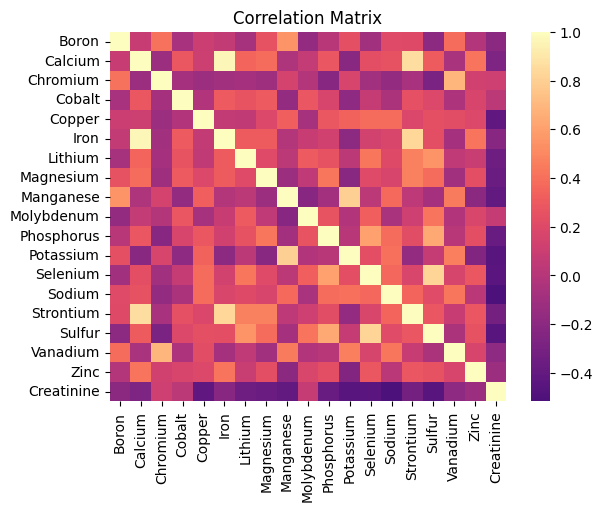

In [86]:
# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='magma', center=0)
plt.title('Correlation Matrix')
plt.show()

### childEssential_subset Data

In [78]:
# Select the columns that contain essential element predictors
predictor_columns = ['Boron', 'Calcium', 'Chromium',
       'Cobalt', 'Copper', 'Iron', 'Lithium', 'Magnesium', 'Manganese',
       'Molybdenum', 'Phosphorus', 'Potassium', 'Selenium', 'Sodium',
       'Strontium', 'Sulfur', 'Vanadium', 'Zinc', 'Creatinine']

# Calculate the correlation matrix
corr_matrix = childEssential_subset[predictor_columns].corr()

# Display the correlation matrix
print(corr_matrix)

               Boron   Calcium  Chromium    Cobalt    Copper      Iron   
Boron       1.000000  0.081757  0.407813 -0.065262  0.098215  0.060715  \
Calcium     0.081757  1.000000 -0.120290  0.283998  0.099666  0.967354   
Chromium    0.407813 -0.120290  1.000000 -0.083071 -0.128955 -0.098354   
Cobalt     -0.065262  0.283998 -0.083071  1.000000 -0.023691  0.302262   
Copper      0.098215  0.099666 -0.128955 -0.023691  1.000000  0.063041   
Iron        0.060715  0.967354 -0.098354  0.302262  0.063041  1.000000   
Lithium    -0.076278  0.350803 -0.079157  0.261212  0.049876  0.310581   
Magnesium   0.250369  0.388201 -0.113281  0.302364  0.193352  0.312641   
Manganese   0.547624 -0.034174  0.145771 -0.171587  0.323571 -0.012884   
Molybdenum -0.168612  0.068217 -0.012842  0.276699 -0.073252  0.084909   
Phosphorus  0.000307  0.276708 -0.218089  0.164645  0.285396  0.132654   
Potassium   0.237380 -0.210503  0.168678 -0.187442  0.337587 -0.191672   
Selenium   -0.093593  0.233269 -0.0919

These elements have high correlations:  
Calcium and Magnesium have a correlation coefficient of 0.388201  
Calcium and Strontium have a correlation coefficient of 0.859805  
Iron and Calcium have a correlation coefficient of 0.967354  
Iron and Magnesium have a correlation coefficient of 0.312641  
Iron and Strontium have a correlation coefficient of 0.828568  
Manganese and Potassium have a correlation coefficient of 0.796127  
Boron and Manganese have a correlation coefficient of 0.547624  
Chromium and Vanadium have a correlation coefficient of 0.688543  
These correlations indicate that there may be some underlying relationships or dependencies between these variables. However, it is important to note that correlation does not necessarily imply causation, and further analysis would be needed to determine the nature of these relationships.

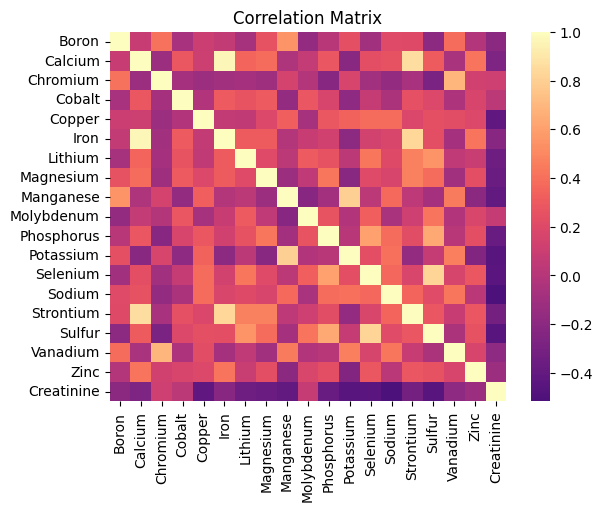

In [79]:
# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='magma', center=0)
plt.title('Correlation Matrix')
plt.show()

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 16 - Q1 Analysis: Logistic Regressions: Variance Inflation Factor <a class="anchor" id="PAN_page16"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

## Checking Multicollinearity with Variance Inflation Factor (VIF)

Variance inflation factor (VIF) measures the extent to which the variance of an estimated regression coefficient is increased due to collinearity among the predictor variables. A VIF value of 1 indicates no correlation between a predictor variable and the other variables, while a value of 5 or above indicates a high degree of correlation.

### childToxic_subset Data

In [80]:
# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(childToxic_subset.drop("Status", axis=1).values, i) for i in range(childToxic_subset.shape[1]-1)]
vif["Predictor"] = childToxic_subset.columns.drop("Status")

# display the VIFs
print(vif)

    VIF Factor   Predictor
0     6.765832    Aluminum
1     3.029613    Antimony
2     2.768722     Arsenic
3     6.837791      Barium
4          inf   Beryllium
5     1.566647     Bismuth
6     1.864104     Cadmium
7    16.204812      Cesium
8     1.439292  Gadolinium
9     8.631501        Lead
10    1.477657     Mercury
11    8.322813      Nickel
12         inf   Palladium
13         inf    Platinum
14         inf   Tellurium
15    8.971717    Thallium
16         inf     Thorium
17    3.275277         Tin
18    2.320321    Tungsten
19    1.390332     Uranium


/usr/local/Cellar/jupyterlab/3.6.3/libexec/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/Cellar/jupyterlab/3.6.3/libexec/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/Cellar/jupyterlab/3.6.3/libexec/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/Cellar/jupyterlab/3.6.3/libexec/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/Cellar/jupyterlab/3.6.3/libexec/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in s

Based on the VIF values, it seems that Beryllium, Palladium, Platinum, and Tellurium have infinite VIF values, which could indicate that these variables are perfectly correlated with one or more of the other variables in the model. This should be investigated further.

Variables with high VIF values are Aluminum, Barium, Cesium, Lead, Nickel, and Thallium, which suggests that these variables are highly correlated with one or more of the other variables in the model. If this is the case, it could be problematic for the model since it may cause issues with model interpretation and stability. It's important to identify the source of the multicollinearity and consider ways to address it, such as removing one or more of the correlated variables or using a different modeling approach.

On the other hand, variables with low VIF values, such as Bismuth, Cadmium, Gadolinium, Mercury, Tin, Tungsten, and Uranium, have lower degrees of multicollinearity with other variables and may be good predictors in the model.

### childEssential_subset Data

In [81]:
# calculate VIF for each predictor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(childEssential_subset.drop("Status", axis=1).values, i) for i in range(childEssential_subset.shape[1]-1)]
vif["Predictor"] = childEssential_subset.columns.drop("Status")


# display the VIFs
print(vif)

    VIF Factor   Predictor
0    14.188669       Boron
1    99.793089     Calcium
2    15.459840    Chromium
3     5.284753      Cobalt
4    17.190751      Copper
5    91.410496        Iron
6    10.607305     Lithium
7    20.894110   Magnesium
8    23.280519   Manganese
9     8.887762  Molybdenum
10   17.569043  Phosphorus
11   22.988763   Potassium
12   46.454833    Selenium
13   16.702465      Sodium
14   46.706092   Strontium
15   58.448534      Sulfur
16   28.509322    Vanadium
17   13.039539        Zinc
18    4.764125  Creatinine


Boron, Chromium, Cobalt, Lithium, Molybdenum, Phosphorus, Sodium, and Zinc all have VIF values below 10, indicating a low degree of correlation. However, the predictors Calcium, Copper, Iron, Magnesium, Manganese, Potassium, Selenium, Strontium, Sulfur, and Vanadium all have VIF values above 10, indicating a high degree of correlation.

It's important to note that while a high VIF value is often interpreted as evidence of collinearity, it does not necessarily imply causality. If you observe a high VIF value for a predictor, it could be due to the influence of other variables, rather than the predictor itself. In such cases, it's important to assess the nature of the correlation between the variables and consider potential solutions such as dropping the highly correlated predictors or performing principal component analysis to reduce the number of variables.

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 17 - Q1 Analysis: Logistic Regressions: Principal Component Analysis <a class="anchor" id="PAN_page17"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

## Adjusting Multicollinarity with a Principal Component Analysis

PCA is a data analysis technique that aims to reduce the dimensionality of a dataset by transforming the original variables into a smaller number of uncorrelated components, called principal components. These components are sorted based on their explained variance and can be used as new variables in further analyses.

PCA can mitigate the impact of multicollinearity by combining correlated variables into a smaller number of orthogonal components. However, it's important to acknowledge that PCA has certain limitations and may not be appropriate for every dataset or research question.

### childToxic_subset Data

In [82]:
# Drop the "Status" column from childToxic_subset
childToxic_subset = childToxic_subset.drop("Status", axis=1)

# Standardize childToxic data
scaler = StandardScaler()
childToxic_std = scaler.fit_transform(childToxic_subset)
# Fit a PCA model to the standardized data
pca = PCA()
pca.fit(childToxic_std)

# Get the explained variance ratio of each component
explained_var = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_var = np.cumsum(explained_var)

# Print the explained variance of each component
print("Explained variance of each component:")
print(explained_var)

# Print the cumulative explained variance of each component
print("Cumulative explained variance of each component:")
print(cumulative_var)

Explained variance of each component:
[3.08692153e-01 1.41597068e-01 8.81597847e-02 6.73477755e-02
 6.30919225e-02 6.12170428e-02 5.18148174e-02 4.62563814e-02
 3.43982584e-02 3.30826768e-02 2.63962301e-02 2.37532938e-02
 1.96876418e-02 1.60255958e-02 1.22836740e-02 6.19568387e-03
 6.26244433e-32 1.07085395e-33 3.56696994e-34 1.59526876e-34]
Cumulative explained variance of each component:
[0.30869215 0.45028922 0.53844901 0.60579678 0.6688887  0.73010575
 0.78192056 0.82817695 0.8625752  0.89565788 0.92205411 0.9458074
 0.96549505 0.98152064 0.99380432 1.         1.         1.
 1.         1.        ]


The output shows the explained variance and cumulative explained variance of each component. The first component explains 30.86% of the variance in the data, the second component explains an additional 14.15% of the variance, and so on. The cumulative explained variance of all the components is as close to 100% as possible, which means that all the variance in the data is explained by the first 14 principal components.

In [83]:
# Create a PCA object with the desired number of components
pca = PCA(n_components=14)

# Fit the PCA model to your data
pca.fit(childToxic_std)

# Transform your data into the principal components
childToxic_pca = pca.transform(childToxic_std)
childToxic_pca

array([[ 6.71332644e+00,  7.18020663e-01, -1.67987786e+00,
         5.14126586e-01,  6.17854392e-02, -1.01064007e+00,
         6.57948139e-01, -1.56507085e-01, -3.14522575e-01,
         4.49237602e-02,  8.56329234e-01, -1.02095288e+00,
         3.29307664e-01,  2.86301087e-01],
       [-1.95056863e+00,  1.48726320e+00, -1.25714500e+00,
         9.64641932e-01, -6.21481361e-01, -4.94604721e-01,
         1.11873453e+00,  3.13204487e-01, -1.12798719e+00,
         2.78300030e-01, -4.58257339e-01, -7.45536278e-01,
        -1.07892075e+00, -9.24861243e-01],
       [-3.13037096e-01,  5.09306561e-01,  1.58243554e+00,
        -2.83019661e+00, -7.32746933e-01,  5.45683923e-01,
         9.78269949e-01,  1.09809603e-01, -7.56683359e-01,
         4.55743969e-01, -4.76007767e-01, -5.17895481e-01,
         8.95387126e-02,  2.31649018e-01],
       [-9.35120977e-01,  1.00745035e+00,  1.26747027e+00,
         2.51072921e-01, -1.82498861e+00,  3.94370564e-01,
         2.00949102e+00, -1.43805749e+00, -1.

### childEssential_subset Data

In [84]:
# Drop the "Status" column from childEssential_subset
childEssential_subset = childEssential_subset.drop("Status", axis=1)

# Standardize childEssential data
scaler = StandardScaler()
childEssential_std = scaler.fit_transform(childEssential_subset)
# Fit a PCA model to the standardized data
pca = PCA()
pca.fit(childEssential_std)

# Get the explained variance ratio of each component
explained_var = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_var = np.cumsum(explained_var)

# print the explained variance of each component
print("Explained variance of each component:")
print(explained_var)

# print the cumulative explained variance of each component
print("Cumulative explained variance of each component:")
print(cumulative_var)

Explained variance of each component:
[0.26073136 0.17957783 0.12094067 0.08578178 0.06377141 0.05546581
 0.04322318 0.03746362 0.03447858 0.02784903 0.02341109 0.02121435
 0.01546576 0.01219691 0.00829341 0.00409517 0.00344364 0.00178758
 0.00080885]
Cumulative explained variance of each component:
[0.26073136 0.44030918 0.56124985 0.64703163 0.71080304 0.76626885
 0.80949203 0.84695565 0.88143423 0.90928325 0.93269434 0.95390869
 0.96937445 0.98157136 0.98986477 0.99395994 0.99740357 0.99919115
 1.        ]


The output shows the explained variance and cumulative explained variance of each component. The first component explains 26.07% of the variance in the data, the second component explains an additional 17.95% of the variance, and so on. The cumulative explained variance of all the components is as close to 100% as possible, which means that all the variance in the data is explained by the first 14 principal components.